# Cargando las imagenes de las lesiones

In [4]:
import os
#import skimage.data as im
import skimage.io as im
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from skimage import exposure,color, transform
from skimage.transform import rotate
#from skimage.color import rgb2gray
#import cv2

In [5]:
#mainpath = "D:/Datasets Kaggle/Dataset cancer de piel/imagenes HAM/"
mainpath = "C:/Users/DELL/Desktop/Curso machine learning python/datasets/imagenes HAM/"
data = pd.read_csv("../datasets/cancer de piel/metadata_ordenado.csv")

images_mod = []
dirs = [d for d in os.listdir(mainpath)]
for f in dirs:
    imagen = im.imread(mainpath + f)
    im_mod = transform.resize(imagen, (32,32)) #originalmente 28*28
    #images_mod.append(rgb2gray(im_mod))
    images_mod.append(im_mod)
    imagen, im_mod = 0, 0

In [6]:
labels_im = []
imagenes_mod = [] #se guardaran las todas las imagenes
dirs = [d for d in os.listdir(mainpath)]
for f in range(len(dirs)):
    imagen = im.imread(mainpath + dirs[f])
    im_mod = transform.resize(imagen, (32,32))
    if(data["dx"].iloc[f] == "akiec"):
        for a in range(18):
            imagenes_mod.append(transform.resize(rotate(im_mod, (20 * a)), (32,32)))
            labels_im.append(0)
    if(data["dx"].iloc[f] == "bcc"):
        for b in range(10):
            imagenes_mod.append(transform.resize(rotate(im_mod, (36 * b)), (32,32)))
            labels_im.append(1)
    if(data["dx"].iloc[f] == "bkl"):
        for c in range(5):
            imagenes_mod.append(transform.resize(rotate(im_mod, (72 * c)), (32,32)))
            labels_im.append(2)
    if(data["dx"].iloc[f] == "df"):
        for d in range(45):
            imagenes_mod.append(transform.resize(rotate(im_mod, (8 * d)), (32,32)))
            labels_im.append(3)
    if(data["dx"].iloc[f] == "mel"):
        for e in range(5):
            imagenes_mod.append(transform.resize(rotate(im_mod, (72 * e)), (32,32)))
            labels_im.append(4)
    if(data["dx"].iloc[f] == "nv"):
        imagenes_mod.append(im_mod)
        labels_im.append(5)
    if(data["dx"].iloc[f] == "vasc"):
        for g in range(40):
            imagenes_mod.append(transform.resize(rotate(im_mod, (9 * g)), (32,32)))
            labels_im.append(6)

In [7]:
diccionario = {0:"akiec", 1:"bcc", 2:"bkl", 3:"df", 4:"mel", 5:"nv", 6:"vasc"}
tipos_lesiones = []
for i in range(len(labels_im)):
    tipos_lesiones.append(diccionario[labels_im[i]])

In [8]:
len(imagenes_mod)

39646

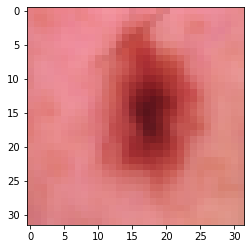

In [9]:
plt.imshow(imagenes_mod[0])
#Se cambió el tamaño de la imagen para que las imagenes ocupen menos espacio en memoria

In [10]:
imagenes_mod[0]

array([[[0.89803922, 0.498269  , 0.51395527],
        [0.90196078, 0.49019608, 0.49411765],
        [0.90117953, 0.49803922, 0.49411765],
        ...,
        [0.91764706, 0.54117647, 0.57254902],
        [0.91372549, 0.54509804, 0.56862745],
        [0.90196078, 0.54117647, 0.5527114 ]],

       [[0.89411765, 0.49833027, 0.51625306],
        [0.89019608, 0.4745098 , 0.47351409],
        [0.88627451, 0.4790288 , 0.47058824],
        ...,
        [0.90355392, 0.5310049 , 0.56470588],
        [0.90588235, 0.54117647, 0.56717218],
        [0.90588235, 0.54509804, 0.56421569]],

       [[0.89411765, 0.50980392, 0.53333333],
        [0.89116115, 0.49019608, 0.49508272],
        [0.89411765, 0.48492647, 0.48151042],
        ...,
        [0.89411765, 0.51372549, 0.56078431],
        [0.90196078, 0.5372549 , 0.56078431],
        [0.90588235, 0.54901961, 0.56470588]],

       ...,

       [[0.81943934, 0.46257659, 0.47058824],
        [0.83529412, 0.4745098 , 0.48627451],
        [0.8480239 , 0

In [11]:
imagenes_mod2 = np.array(imagenes_mod)

In [12]:
imagenes_mod2.shape

(39646, 32, 32, 3)

# Cargamos el dataset de metadata

In [13]:
data = pd.read_csv("../datasets/cancer de piel/metadata_ordenado.csv")

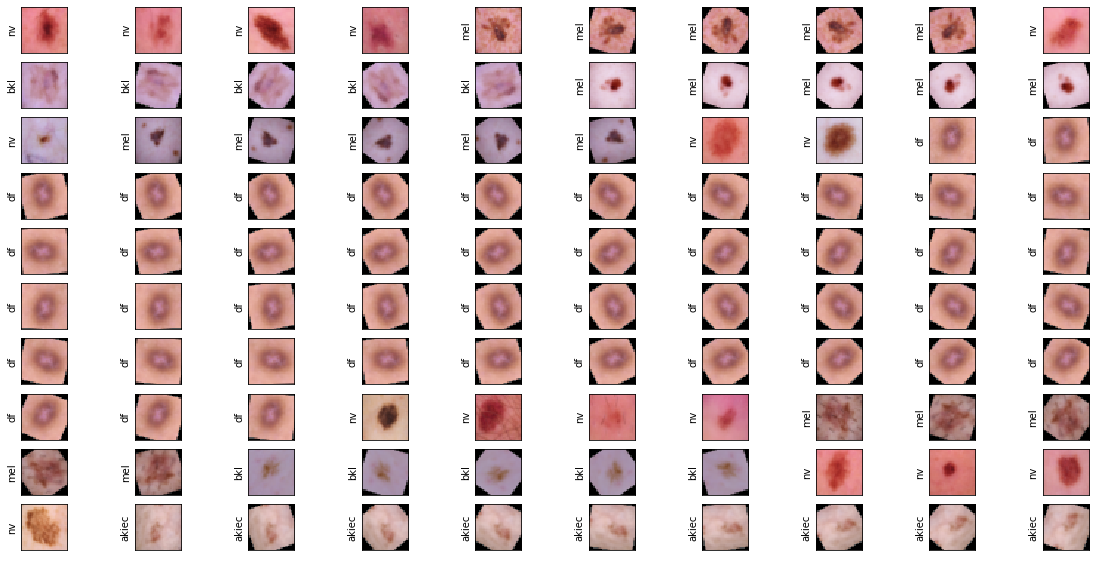

In [14]:
plt.figure(figsize=(20,10))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.ylabel(tipos_lesiones[i])
    plt.imshow(imagenes_mod[i], 'gray') #muestro la imagen que esta en la lista en escala de grises
    plt.xticks([])
    plt.yticks([])
#en esta sentencia muestro las primera 100 imagenes del conjunto de imagenes

unicos = np.unique(data["dx"]) #Imprime los valores unicos del dataset
lista = {"akiec":0, "bcc":1, "bkl":2, "df":3, "mel":4, "nv":5, "vasc":6} #creo la lista
labels = []
for i in range(len(data)):
    labels.append(lista[data["dx"].iloc[i]])
#asi ya creo mi diccionario y puedo meter los valores ya sea a una regresion o a una red neural
#labels = np.array(labels)
num_classes = len(np.unique(labels))

# Implemento Plotly para el histograma

In [15]:
import plotly.express as px
#import chart_studio.plotly as py
#import plotly.graph_objs as go
import seaborn as sns

Text(0.5, 1.0, 'Histograma de frecuencia de lesiones en la piel')

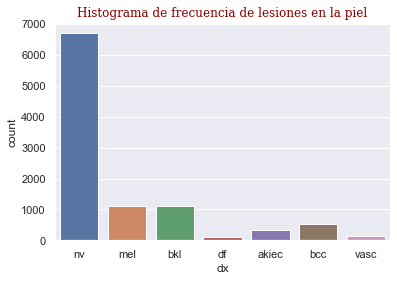

In [16]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 12,
        }
#fig = px.histogram(data, x = 'dx', title='Histograma de frecuencias de lesiones en la piel')
#fig.show()
#plt.style.use("ggplot")
#plt.figure()
#plt.hist(data['dx'])
sns.set(style="darkgrid")
ax = sns.countplot(x="dx", data=data)
plt.title('Histograma de frecuencia de lesiones en la piel', fontdict=font)

In [17]:
data['dx'].value_counts()

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64

In [18]:
dd = pd.DataFrame(data = tipos_lesiones, columns= ['dx'])

Text(0.5, 1.0, 'Histograma de frecuencia de lesiones en la piel aumentado')

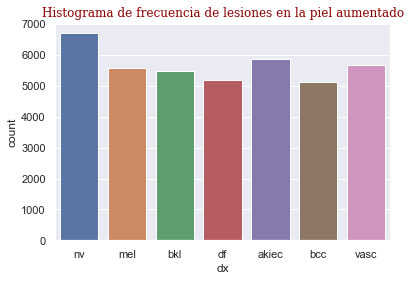

In [19]:
#Inicio sesion en plotly
#plotly.tools.set_credentials_file(username='luisbaduy97', api_key='ZhomWxtOLhI3KpxnLvKU')
sns.set(style="darkgrid")
ax = sns.countplot(x="dx", data=dd)
plt.title('Histograma de frecuencia de lesiones en la piel aumentado', fontdict=font)

In [20]:
dd['dx'].value_counts()

nv       6705
akiec    5886
vasc     5680
mel      5565
bkl      5495
df       5175
bcc      5140
Name: dx, dtype: int64

In [21]:
#title = go.Layout(title= 'Tipos de lesiones', bargap=0.2, colorway=['#FFDEAD'])
#dd2 = [go.Histogram(x=data.dx)]
#fig = go.Figure(data= dd2, layout=title)
#py.iplot(fig)

# Implementamos tensorflow

In [19]:
#import tensorflow as tf
#from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.layers import AveragePooling2D
from keras.optimizers import SGD

Using TensorFlow backend.


In [20]:
X_train, X_test, y_train, y_test = train_test_split(imagenes_mod, labels_im, test_size = 0.25, random_state = 42)
#del images_mod
#del images_mod2

In [21]:
# One hot encode outputs: 
y_train = np_utils.to_categorical(y_train) #Para convertir a vectores categoricos, es lo que se utiliza para la salida de la red
y_test = np_utils.to_categorical(y_test) #Para convertir a vectores categoricos, sirve para la predicción 

In [22]:
X_train2 = []
X_test2 = []
for m in range(len(X_train)):
    X_train2.append(X_train[m])
X_train2 = np.array(X_train2)
for n in range(len(X_test)):
    X_test2.append(X_test[n])
X_test2 = np.array(X_test2)
del X_train
del X_test

In [23]:
X_train2.shape, X_test2.shape

((29734, 32, 32, 3), (9912, 32, 32, 3))

In [24]:
#X_train2 = X_train2.reshape(X_train2.shape[0], 28, 28, 1).astype('float32')
#X_test2 = X_test2.reshape(X_test2.shape[0], 28, 28, 1).astype('float32')

In [25]:
X_train2.shape, X_test2.shape

((29734, 32, 32, 3), (9912, 32, 32, 3))

In [26]:
def DevDay_LeNet5(num_classes):
    """CNN model based on LeNet-5."""
    
    # Create model:
    model = Sequential()
    # Add Conv2D -> 6, (5, 5), input_shape=(32, 32, 1), activation='relu', strides = (1,1)
    model.add(Conv2D(6, (3,3), input_shape = (32,32,3), activation='relu', strides = (1,1))) #stride (1,1)
    # Add MaxPooling2D -> pool_size=(2, 2)
    #model.add(AveragePooling2D(pool_size=(2,2), strides = (2,2)))
    model.add(MaxPooling2D(pool_size=(2,2), strides = (2,2)))
    
    # Add Conv2D -> 16, (3, 3), activation='relu'
    model.add(Conv2D(16, (3,3), activation='relu', strides = (1,1))) #stride (1,1)
    # Add MaxPooling2D -> pool_size=(2, 2)
    #model.add(AveragePooling2D(pool_size=(2,2), strides = (2,2)))
    model.add(MaxPooling2D(pool_size=(2,2), strides = (2,2)))
    
    
   
    #model.add(Flatten())
    #model.add(Dropout(0.25))  # Let's try to avoid overfitting... #Elimina el 20 porciento de la conexiones sinapticas para evitar el overfitting
    ## Add Dense -> 128, activation='relu'
    #model.add(Dense(120, activation='relu'))
    model.add(Conv2D(120,(5,5), strides=(1,1), activation = 'relu'))
    model.add(Flatten())
    # Add Dense -> 50, activation='relu'
    model.add(Dropout(0.2))
    model.add(Dense(84, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    #opt = SGD(lr=0.01, momentum=0.9)
    # Compile model:
    model.compile(loss='categorical_crossentropy', optimizer= 'adam', 
              metrics=['accuracy'])
    return model

In [27]:
num_classes = 7
# Build the model:
model = DevDay_LeNet5(num_classes)
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 6)         168       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 16)        880       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 2, 120)         48120     
_________________________________________________________________
flatten_1 (Flatten)          (None, 480)               0         
________________________________________________

In [28]:
## 200 epocas, bache 100 y average pooling 85.3%
#Ajustes de la red en los filtros de las capas 100 epoch, 100 batch 85%
## Set hyperparameters
######Ferro
EPOCHS = 100 #Numero de veces de iteracion #intertar 500, original 50
BATCH = 100 #Numero de neuronas que se van a estar actualizando en cada epooca #optimo 5, 100 try with 50

# Fit the model
history = model.fit(X_train2, y_train, validation_data=(X_test2, y_test), 
                    epochs=EPOCHS, batch_size=BATCH)


Instructions for updating:
Use tf.cast instead.
Train on 29734 samples, validate on 9912 samples
Epoch 1/100
29734/29734 [==============================] - 9s 315us/step - loss: 1.4222 - accuracy: 0.4355 - val_loss: 1.1447 - val_accuracy: 0.5593
Epoch 2/100
29734/29734 [==============================] - 4s 124us/step - loss: 1.1084 - accuracy: 0.5708 - val_loss: 1.0780 - val_accuracy: 0.5690
Epoch 3/100
29734/29734 [==============================] - 4s 121us/step - loss: 1.0191 - accuracy: 0.5998 - val_loss: 0.9971 - val_accuracy: 0.6045
Epoch 4/100
29734/29734 [==============================] - 4s 121us/step - loss: 0.9603 - accuracy: 0.6277 - val_loss: 0.9103 - val_accuracy: 0.6468
Epoch 5/100
29734/29734 [==============================] - 4s 124us/step - loss: 0.9035 - accuracy: 0.6530 - val_loss: 0.9112 - val_accuracy: 0.6495
Epoch 6/100
29734/29734 [==============================] - 4s 123us/step - loss: 0.8405 - accuracy: 0.6780 - val_loss: 0.7824 - val_accuracy: 0.7029
Epoch 7/1

In [29]:
model.save_weights('modelo_2_dic_2019.h5')

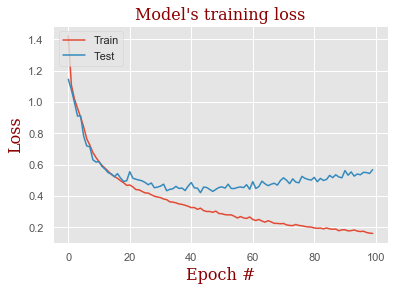

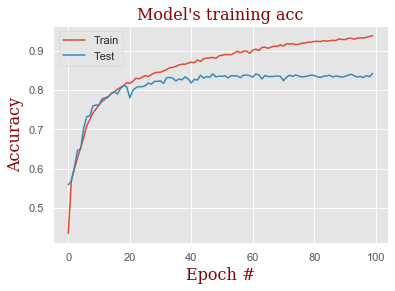

In [30]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
def plot_loss(history):
    plt.style.use("ggplot")
    plt.figure()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title("Model's training loss",fontdict=font)
    plt.xlabel("Epoch #",fontdict=font)
    plt.ylabel("Loss",fontdict=font)
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()


def plot_accuracy(history):
    plt.style.use("ggplot")
    plt.figure()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title("Model's training acc",fontdict=font)
    plt.xlabel("Epoch #",fontdict=font)
    plt.ylabel("Accuracy",fontdict=font)
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
plot_loss(history)
plot_accuracy(history)

In [31]:
#test_loss, test_acc = model.evaluate(X_test2, y_test)
#print('Test accuracy:', test_acc)
# Final evaluation of the model:
scores = model.evaluate(X_test2, y_test, verbose=1)
print(f'Test score: {scores[0]}')
print(f'Test accuracy: {scores[1]}')

9912/9912 [==============================] - 1s 94us/step
Test score: 0.5684904042417913
Test accuracy: 0.8423123359680176


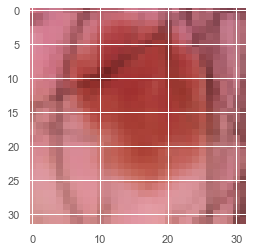

In [32]:
plt.imshow(X_train2[0])

In [33]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [34]:
np.argmax(y_train[0])

5

# Para obtener la matriz de confusión

In [35]:
lista = {"akiec":0, "bcc":1, "bkl":2, "df":3, "mel":4, "nv":5, "vasc":6}

In [36]:
preds = model.predict(X_test2)

In [37]:
pred_labels = []
ori = []
for i in range(len(preds)):
    arg = np.argmax(preds[i])
    arg2 = np.argmax(y_test[i])
    pred_labels.append(arg)
    ori.append(arg2)

In [38]:
f_pred = []
f_ori = []
for k in range(len(pred_labels)):
    prediction = list(lista.keys())[list(lista.values()).index(pred_labels[k])]
    original = list(lista.keys())[list(lista.values()).index(ori[k])]
    f_pred.append(prediction)
    f_ori.append(original)

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
#%matplotlib qt

In [40]:
print(classification_report(f_ori, f_pred))

              precision    recall  f1-score   support

       akiec       0.93      0.92      0.92      1492
         bcc       0.76      0.82      0.79      1271
         bkl       0.71      0.58      0.64      1364
          df       0.95      0.94      0.94      1297
         mel       0.72      0.67      0.70      1347
          nv       0.83      0.94      0.88      1704
        vasc       0.96      0.99      0.97      1437

    accuracy                           0.84      9912
   macro avg       0.84      0.84      0.84      9912
weighted avg       0.84      0.84      0.84      9912



Text(0.5, 66.5, 'Real')

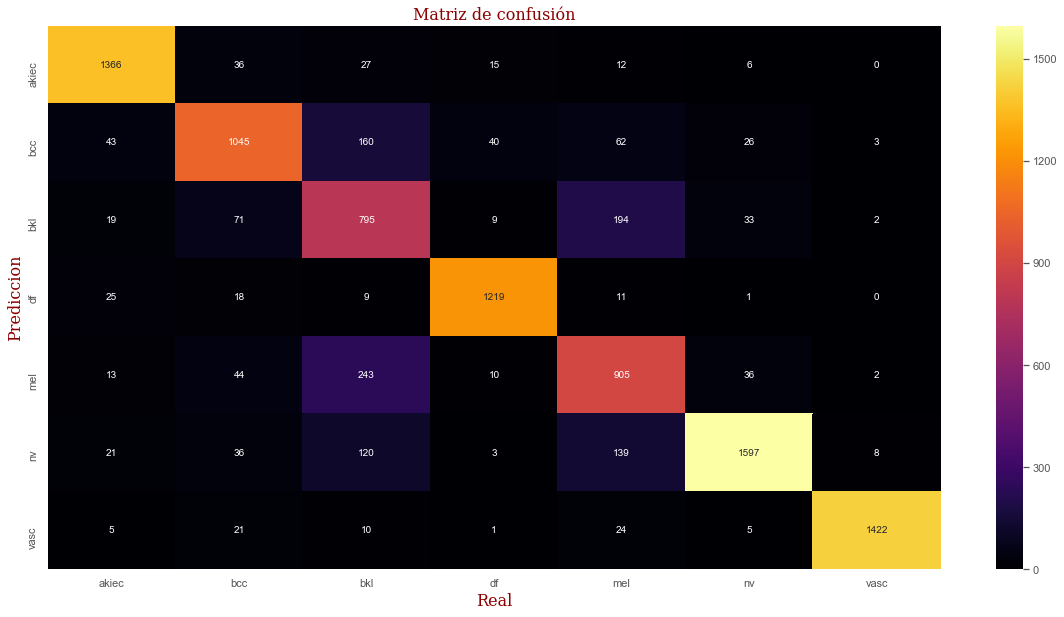

In [41]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
plt.figure(figsize=[20,10])
sns.heatmap(confusion_matrix(f_ori, f_pred).T, xticklabels= np.unique(f_ori), 
            yticklabels= np.unique(f_ori), fmt='d', annot=True, cmap= 'inferno',
           linewidths=0)
plt.title('Matriz de confusión',fontdict=font)
plt.ylabel("Prediccion", fontdict=font)
plt.xlabel("Real", fontdict=font)

In [42]:
len(labels_im)

39646

In [43]:
len(labels_im)

39646

In [44]:
#pred_labels

In [45]:
confusion_matrix(f_ori, f_pred).T

array([[1366,   36,   27,   15,   12,    6,    0],
       [  43, 1045,  160,   40,   62,   26,    3],
       [  19,   71,  795,    9,  194,   33,    2],
       [  25,   18,    9, 1219,   11,    1,    0],
       [  13,   44,  243,   10,  905,   36,    2],
       [  21,   36,  120,    3,  139, 1597,    8],
       [   5,   21,   10,    1,   24,    5, 1422]], dtype=int64)

# Para ver los filtros

In [46]:
from keras.models import Model

In [47]:
# summarize feature map shapes
for i in range(len(model.layers)):
	layer = model.layers[i]
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# summarize output shape
	print(i, layer.name, layer.output.shape)

0 conv2d_1 (?, 30, 30, 6)
2 conv2d_2 (?, 13, 13, 16)
4 conv2d_3 (?, 2, 2, 120)


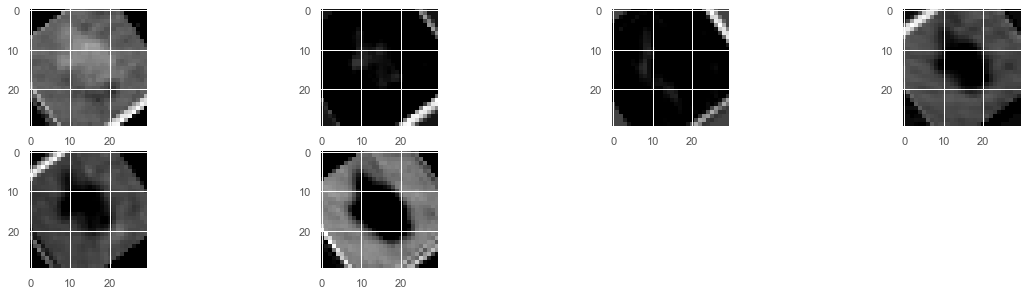

In [48]:
# redefine model to output right after the first hidden layer
filtros = Model(inputs=model.inputs, outputs=model.layers[0].output)
feature_maps = filtros.predict(X_test2[1].reshape(1, 32, 32, 3).astype('float32'))
plt.figure(figsize=[20,10])
for i in range(6):
    plt.subplot(4,4,i+1)
    plt.imshow(feature_maps[0,:,:,i], 'gray')
plt.show()

In [29]:
#model.save_weights('modelo_19_nov_2019.h5')
#model.load_weights('modelo_19_nov_2019.h5')

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 6)         168       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 16)        880       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)              

In [44]:
model.layers[1]